<a href="https://colab.research.google.com/github/S-Salehin/DMML/blob/main/KNN%20on%20Soccial%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.03449842  0.26845438]
 [ 0.06066963 -0.25929212]
 [-1.65235532  0.12185813]
 [-0.98617895  0.53232764]
 [-1.36685117 -1.22682738]
 [-0.51033869  0.47368914]
 [-1.55718727  0.53232764]
 [-0.8910109   0.56164689]
 [-1.74752338 -1.28546588]
 [-0.60550674  0.18049663]
 [ 1.77369459 -0.28861137]
 [-0.60550674 -0.05405737]
 [-0.22483453 -1.40274288]
 [ 2.05919875 -0.81635787]
 [-1.08134701  0.29777364]
 [-1.84269143 -0.52316537]
 [ 1.48819043  1.00143564]
 [-0.98617895  0.59096614]
 [-0.60550674  0.03390038]
 [-0.70067479  0.29777364]
 [-0.8910109   0.26845438]
 [-0.8910109   0.44436989]
 [ 0.34617379  0.06321963]
 [ 2.15436681 -1.05091188]
 [ 0.82201406  0.35641214]
 [ 0.91718211 -1.05091188]
 [-0.41517063 -0.02473812]
 [-1.08134701 -1.60797763]
 [-0.12966647  2.17420565]
 [-0.22483453 -0.93363487]
 [-0.60550674 -1.52001988]
 [ 1.39302238  1.29462814]
 [-0.32000258 -0.78703862]
 [-1.17651506  0.29777364]
 [ 1.48819043  0.06321963]
 [ 0.72684601 -1.28546588]
 [-0.03449842 -0.49384612]
 

In [6]:
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [7]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1]


In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Confusion Matrix:
 [[48  4]
 [ 2 26]]
Accuracy: 92.50%


<ipython-input-10-df5e4a2d46c7>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


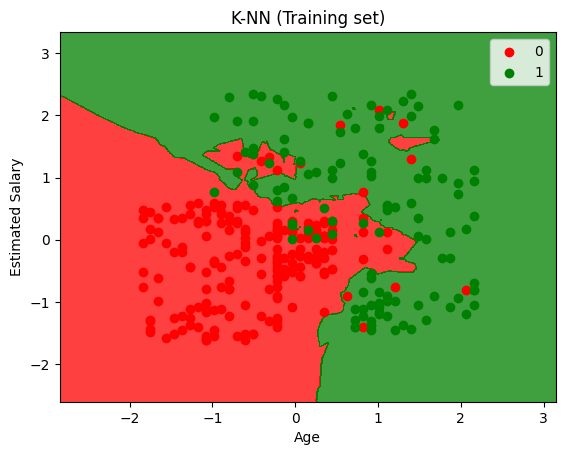

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print("Cross-Validation Accuracy: {:.2f}%".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f}%".format(accuracies.std() * 100))

Cross-Validation Accuracy: 88.75%
Standard Deviation: 6.58%
